In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
sns.set()

Read data from file

In [3]:
all_tracks_df = pd.read_pickle("../../data/spotify_dataset_all.pkl")

In [4]:
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.0939,0.03360,2,-24.041,0,0.0606,0.927,0.830,0.0954,0.0516,67.359,207267,3
5bu9A6uphPWg39RC3ZKeku,classical,0.4540,0.01390,4,-29.966,0,0.0514,0.995,0.943,0.0736,0.2440,130.253,184853,4
3DNRdudZ2SstnDCVKFdXxG,classical,0.1840,0.00527,1,-37.264,0,0.0432,0.995,0.887,0.1730,0.1510,170.612,315427,3
67TCAXIe154ZGDNaWceqxC,classical,0.1590,0.04010,7,-27.516,1,0.0446,0.984,0.760,0.1560,0.1060,106.239,462627,4
1Oo7XEqkrwifJn17aA0ocF,classical,0.2990,0.00626,9,-30.923,1,0.0478,0.994,0.901,0.0823,0.0634,69.043,378733,4


Normalise values

In [5]:
normalised_vals_df = all_tracks_df.loc[:, all_tracks_df.columns != 'genre']
normalised_vals_df = (normalised_vals_df - normalised_vals_df.min())/(normalised_vals_df.max() - normalised_vals_df.min())
all_tracks_df = pd.merge(all_tracks_df[['genre']], normalised_vals_df, left_index=True, right_index=True)
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.035683,0.032810,0.181818,0.441113,0.0,0.101165,0.930723,0.845214,0.084732,0.029023,0.148602,0.084694,0.50
5bu9A6uphPWg39RC3ZKeku,classical,0.426247,0.013053,0.363636,0.308423,0.0,0.076801,0.998996,0.960285,0.062150,0.229169,0.521763,0.062907,0.75
3DNRdudZ2SstnDCVKFdXxG,classical,0.133406,0.004398,0.090909,0.144985,0.0,0.055085,0.998996,0.903259,0.165113,0.132425,0.761220,0.189824,0.50
67TCAXIe154ZGDNaWceqxC,classical,0.106291,0.039328,0.636364,0.363290,1.0,0.058792,0.987952,0.773931,0.147504,0.085613,0.379284,0.332902,0.75
1Oo7XEqkrwifJn17aA0ocF,classical,0.258134,0.005391,0.818182,0.286991,1.0,0.067267,0.997992,0.917515,0.071162,0.041298,0.158594,0.251357,0.75


Change all genres except rock to other

In [7]:
all_tracks_df.loc[all_tracks_df['genre'] != 'rock', 'genre'] = 'other'

Look at genre distribution

<AxesSubplot:ylabel='genre'>

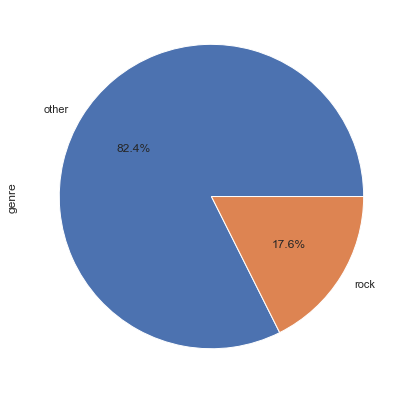

In [8]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

In [9]:
all_tracks_df['genre'].value_counts()

other    5444
rock     1163
Name: genre, dtype: int64

Resample data

In [10]:
pop_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'rock'].sample(n=1000, random_state=1)
other_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'other'].sample(n=1000, random_state=1)
resampled_tracks_df = pd.concat([pop_sample_df, other_sample_df])
resampled_tracks_df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1Qc7zCw6k2KTvSEl4IKSdP,rock,0.440347,0.381215,0.000000,0.670280,1.0,0.010593,0.235941,0.125255,0.179615,0.700406,0.234010,0.223883,0.75
5qqabIl2vWzo9ApSC317sa,rock,0.343818,0.897705,0.181818,0.888451,1.0,0.048464,0.000451,0.000000,0.186866,0.463227,0.783113,0.134757,0.75
5gOnivVq0hLxPvIPC00ZhF,rock,0.327549,0.804436,0.000000,0.798356,1.0,0.099576,0.011744,0.006120,0.181686,0.722251,0.674803,0.142300,0.75
3IXRdLsQib8m0hBbQpe7T8,rock,0.485900,0.923780,0.818182,0.916288,0.0,0.022775,0.021985,0.001191,0.499689,0.646312,0.297768,0.095891,0.75
2mHchPRtQWet3iIS3jANr1,rock,0.263557,0.902719,0.818182,0.805814,1.0,0.100106,0.001051,0.000383,0.149575,0.538125,0.622306,0.077098,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1btu0d80Q8qkkqUCkud15r,other,0.574837,0.874638,0.818182,0.846013,1.0,0.032839,0.023089,0.312627,0.086493,0.651514,0.484586,0.035615,0.75
1xUJ1mdLAysxNBtO9w3J2g,other,0.503254,0.221755,0.909091,0.731709,0.0,0.039460,0.839357,0.081365,0.038740,0.646312,0.676684,0.073288,0.75
6KfoDhO4XUWSbnyKjNp9c4,other,0.614967,0.639961,0.727273,0.857232,1.0,0.055879,0.001623,0.000000,0.352600,0.488193,0.389999,0.063802,0.75
2vIkEXi009Hxc1K3oMsLqR,other,0.772234,0.809450,0.000000,0.835196,1.0,0.094015,0.003079,0.063544,0.213797,0.410174,0.579920,0.024969,0.75


<AxesSubplot:ylabel='genre'>

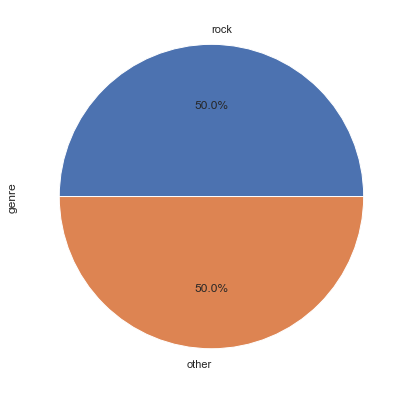

In [11]:
resampled_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

See summary statistics

In [12]:
resampled_tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.544549,0.652398,0.467864,0.791208,0.643500,0.141993,0.220486,0.102488,0.173448,0.505161,0.474261,0.121227,0.737000
std,0.183102,0.236003,0.322225,0.114294,0.479085,0.195451,0.291564,0.248513,0.149325,0.250202,0.171309,0.077732,0.079194
min,0.006074,0.003605,0.000000,0.137706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050515,0.000998,0.000000
25%,0.428416,0.516605,0.181818,0.753678,0.000000,0.033302,0.011116,0.000000,0.079941,0.310049,0.341162,0.073210,0.750000
50%,0.549892,0.696123,0.454545,0.823528,1.000000,0.062632,0.074093,0.000076,0.112285,0.515240,0.472224,0.105215,0.750000
75%,0.670553,0.839537,0.727273,0.863761,1.000000,0.143935,0.317267,0.011354,0.224415,0.698325,0.579384,0.148058,0.750000
max,1.000000,0.997994,1.000000,0.999171,1.000000,0.978814,0.998996,0.997963,1.000000,1.000000,0.959927,0.936444,1.000000


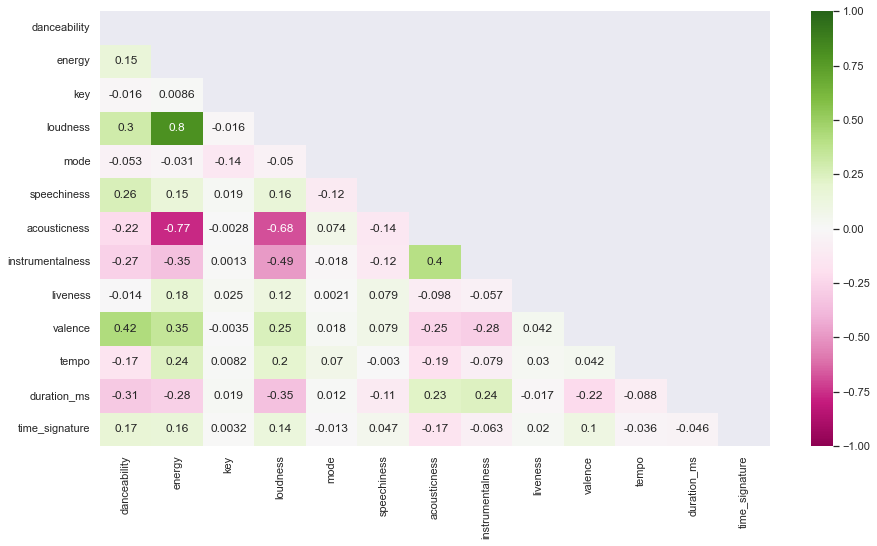

In [13]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(resampled_tracks_df.corr(), dtype=bool))
sns.heatmap(resampled_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG");

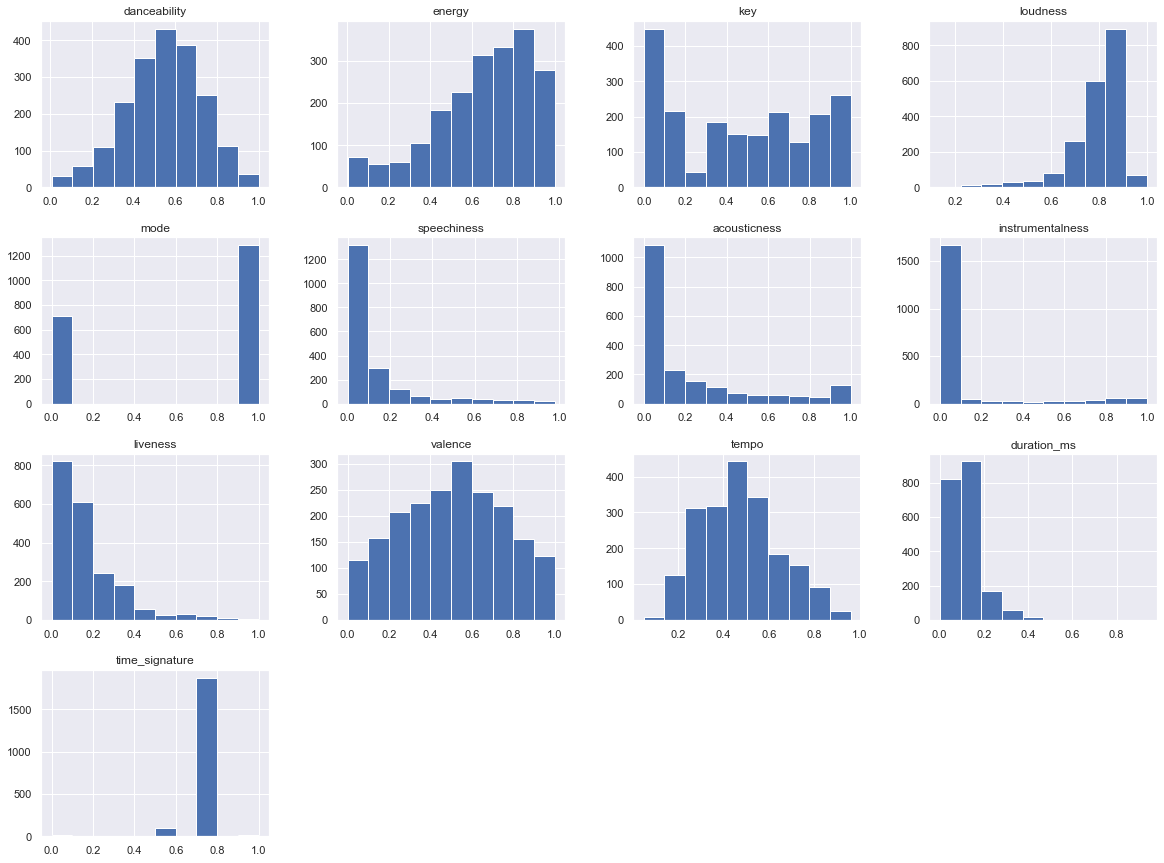

In [14]:
resampled_tracks_df.hist(figsize=(20,15));

Split data

In [15]:
# Feature variables
X = resampled_tracks_df.loc[:, resampled_tracks_df.columns != 'genre']
# Target variable
y = resampled_tracks_df['genre']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Decision Tree

In [17]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train, y_train)

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


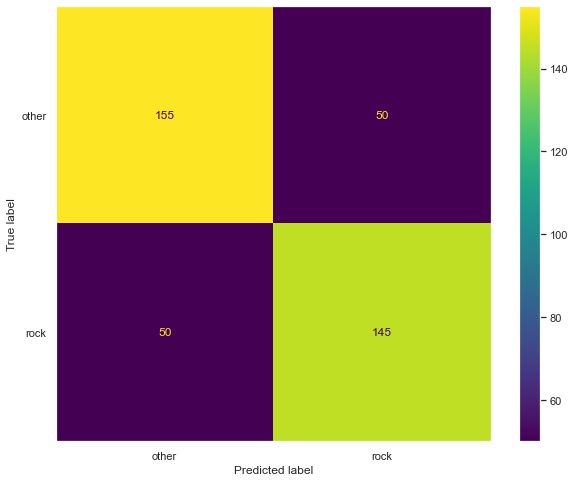

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=dt_clf.classes_, ax=ax);


Pruning decision tree

In [19]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

dt_clfs = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    dt_clfs.append(dt_clf)

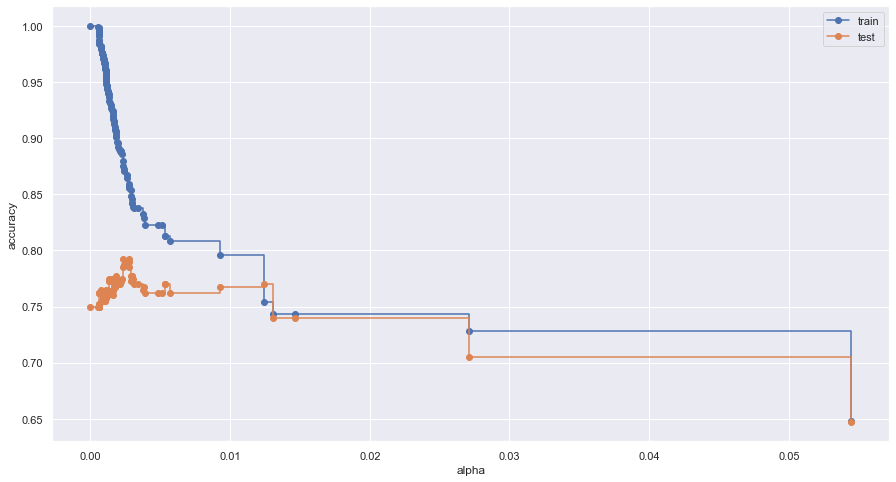

In [20]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in dt_clfs]

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()

In [21]:
best_ccp = ccp_alphas[np.argmax(test_scores)]
best_ccp

0.002353318250377077

Cross Validation

<AxesSubplot:xlabel='tree'>

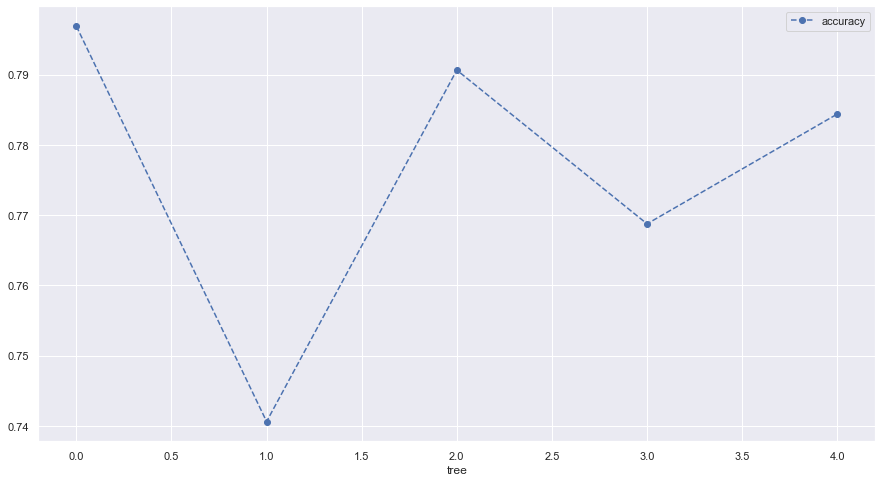

In [22]:
dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp)
scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
fig, ax = plt.subplots(figsize=(15,8))
df.plot(x='tree', y='accuracy', marker='o', linestyle='--', ax=ax)

Above shows alpha is sensitive to different training/testing data.

<AxesSubplot:xlabel='alpha'>

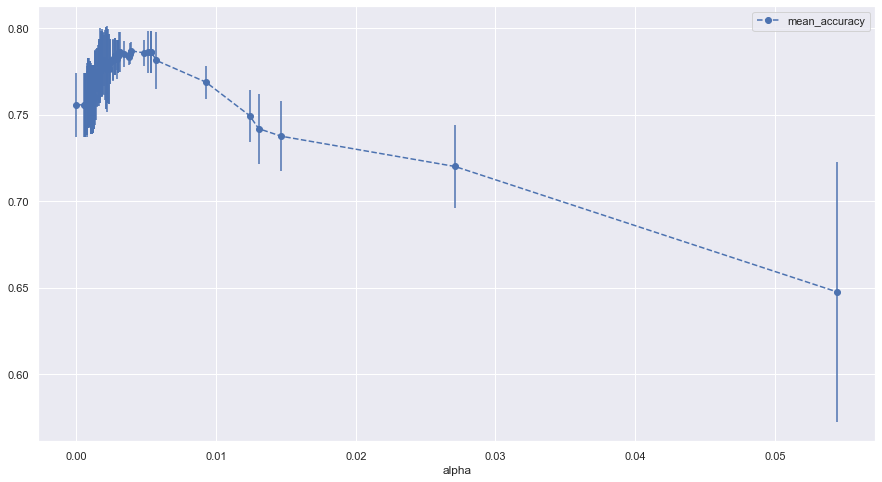

In [23]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
fig, ax = plt.subplots(figsize=(15,8))
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--', ax=ax)

In [24]:
ideal_ccp = alpha_results.iloc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_ccp

0.003878157259407258

Building final tree

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


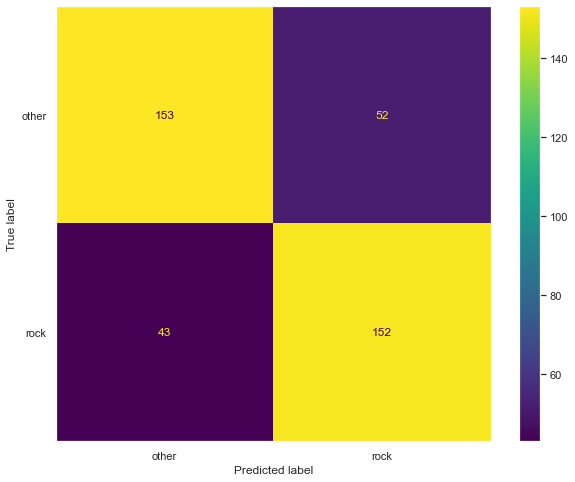

In [25]:
dt_clf_pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=ideal_ccp)
dt_clf_pruned = dt_clf_pruned.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf_pruned, X_test, y_test, display_labels=dt_clf_pruned.classes_, ax=ax);

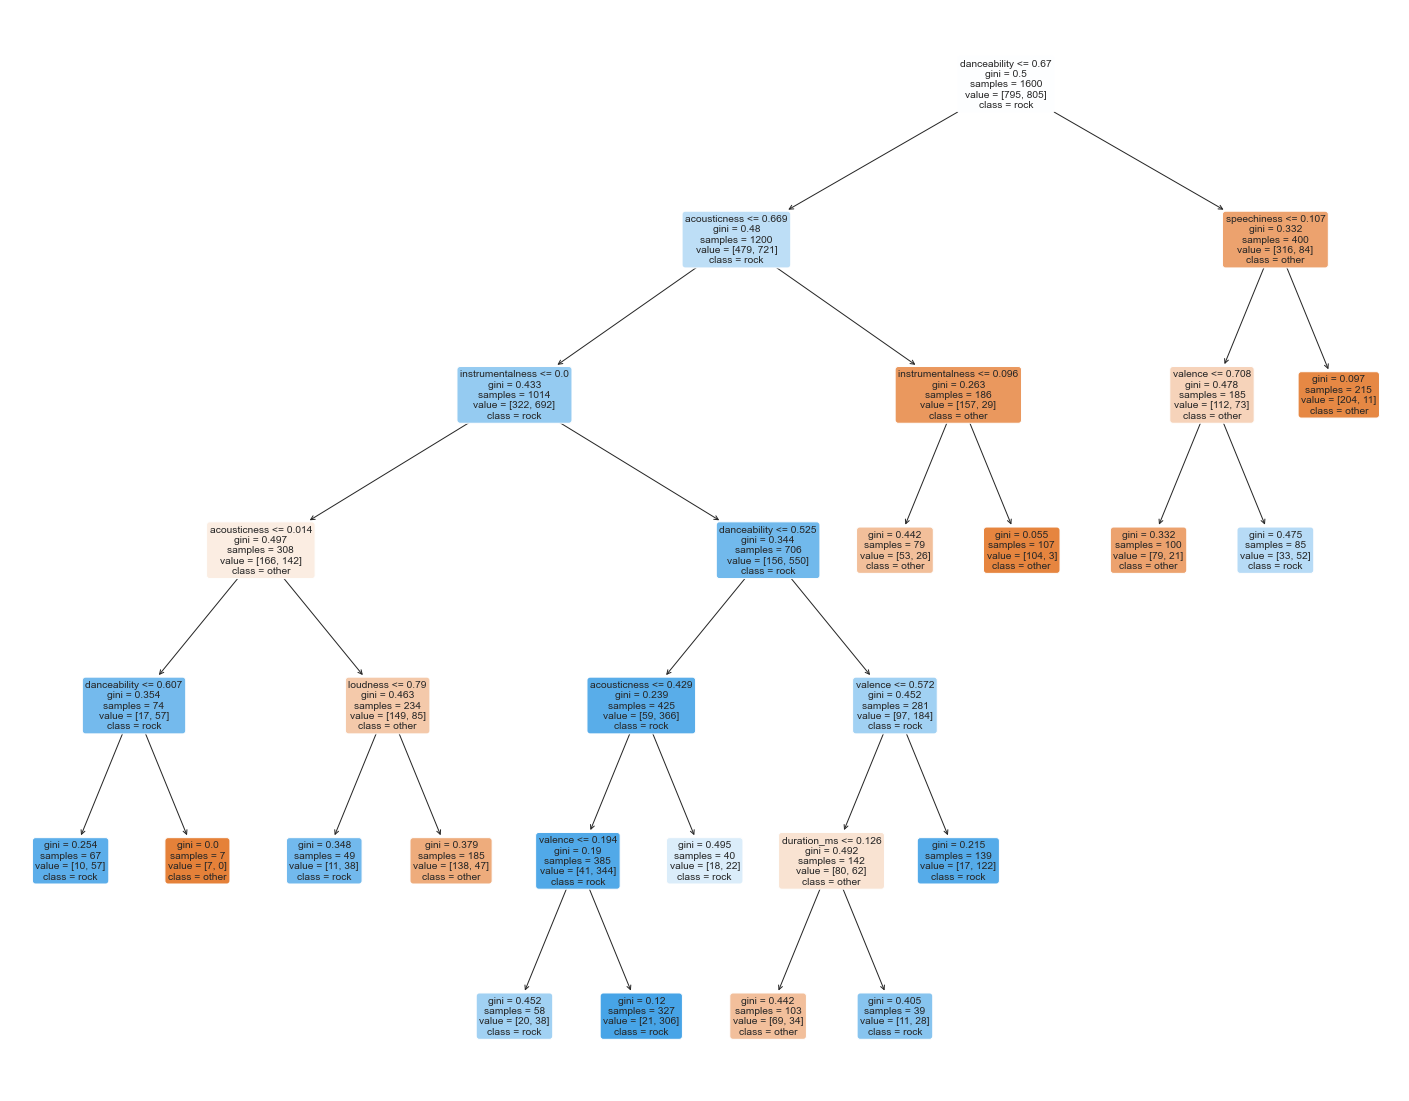

In [26]:
plt.figure(figsize=(25,20))
plot_tree(dt_clf_pruned, filled=True, rounded=True, class_names=dt_clf_pruned.classes_, feature_names=X.columns);

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [28]:
df = pd.read_pickle("../data/spotify_dataset_all.pkl")
df.loc[df['genre'] != 'rock', 'genre'] = 0
df.loc[df['genre'] == 'rock', 'genre'] = 1
df['genre'] = df['genre'].astype(int)
pdf = df.loc[df['genre'] == 1].sample(n=1000, random_state=1)
odf = df.loc[df['genre'] == 0].sample(n=1000, random_state=1)
df = pd.concat([pdf, odf])
df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1Qc7zCw6k2KTvSEl4IKSdP,1,0.467,0.381,0,-13.808,1,0.0264,0.235000,0.123000,0.1870,0.6970,81.754,350467,4
5qqabIl2vWzo9ApSC317sa,1,0.378,0.896,2,-4.066,1,0.0407,0.000452,0.000000,0.1940,0.4690,174.302,258773,4
5gOnivVq0hLxPvIPC00ZhF,1,0.363,0.803,0,-8.089,1,0.0600,0.011700,0.006010,0.1890,0.7180,156.047,266533,4
3IXRdLsQib8m0hBbQpe7T8,1,0.509,0.922,9,-2.823,0,0.0310,0.021900,0.001170,0.4960,0.6450,92.500,218787,4
2mHchPRtQWet3iIS3jANr1,1,0.304,0.901,9,-7.756,1,0.0602,0.001050,0.000376,0.1580,0.5410,147.199,199453,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1btu0d80Q8qkkqUCkud15r,0,0.591,0.873,9,-5.961,1,0.0348,0.023000,0.307000,0.0971,0.6500,123.987,156774,4
1xUJ1mdLAysxNBtO9w3J2g,0,0.525,0.222,10,-11.065,0,0.0373,0.836000,0.079900,0.0510,0.6450,156.364,195533,4
6KfoDhO4XUWSbnyKjNp9c4,0,0.628,0.639,8,-5.460,1,0.0435,0.001620,0.000000,0.3540,0.4930,108.045,185773,4
2vIkEXi009Hxc1K3oMsLqR,0,0.773,0.808,0,-6.444,1,0.0579,0.003070,0.062400,0.2200,0.4180,140.055,145821,4


In [29]:
X = df.loc[:, df.columns != 'genre']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
lr = sm.Logit(y_train, X_train).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.455444
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  genre   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1587
Method:                           MLE   Df Model:                           12
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.3429
Time:                        17:42:32   Log-Likelihood:                -728.71
converged:                       True   LL-Null:                       -1109.0
Covariance Type:            nonrobust   LLR p-value:                4.653e-155
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability        -7.3046      0.540    -13.524      0.000      -8.363      -6.246
energy               2.8383      0.530      5.360      0.000       1.800       3.876
key                 -0.0249      0.019     -1.333      0.183      -0.062       0.012
loudness            -0.1290      0.023     -5.541      0.000      -0.175      -0.083
mode                 0.3837      0.139      2.763      0.006       0.112       0.656
speechiness        -12.5104      1.311     -9.543      0.000     -15.080      -9.941
acousticness        -2.8394      0.364     -7.799      0.000      -3.553      -2.126
instrumentalness    -1.7353      0.325     -5.341      0.000      -2.372      -1.099
liveness             0.8037      0.487      1.652      0.099      -0.150       1.757
valence              3.1820      0.343      9.280      0.000       2.510       3.854
tempo               -0.0009      0.002     -0.410      0.682      -0.005       0.004
duration_ms       2.448e-06   9.01e-07      2.718      0.007    6.83e-07    4.21e-06
time_signature       0.1177      0.145      0.813      0.416      -0.166       0.401
====================================================================================
"""